## Testing SciPy
This tests out the use of a multivariate normal distribution, since its what i want to use for the cross entropy method

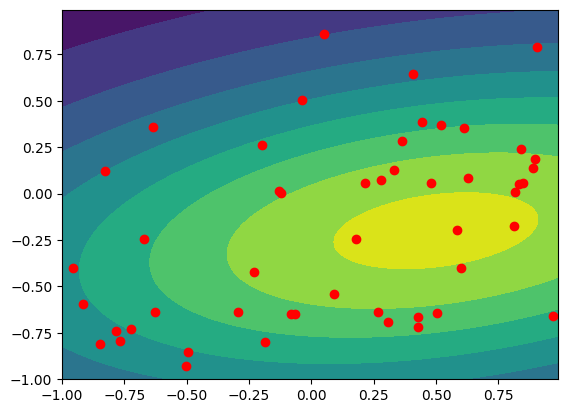

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# tutorial from scipy documentation
x, y = np.mgrid[-1:1:0.01, -1:1:0.01]
pos = np.dstack((x, y))
rv = sp.stats.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.contourf(x,y, rv.pdf(pos))

# lets try sampling from the MV distribution
# Bounds for the region in which to sample
lower_bound = [-1, -1]  # Lower bounds (xmin, ymin)
upper_bound = [1, 1]  # Upper bounds (xmax, ymax)

# Function to sample points within the bounds
def sample_within_bounds(dist, lower_bound, upper_bound, num_samples):
    samples = []
    while len(samples) < num_samples:
        # Sample from the multivariate normal distribution
        sample = dist.rvs()
        
        # Check if the sample is within the bounds
        if np.all(sample >= lower_bound) and np.all(sample <= upper_bound):
            samples.append(sample)
    
    return np.array(samples)

samples = sample_within_bounds(rv, lower_bound, upper_bound, 50)

ax1.plot(samples[:, 0], samples[:, 1], 'ro')

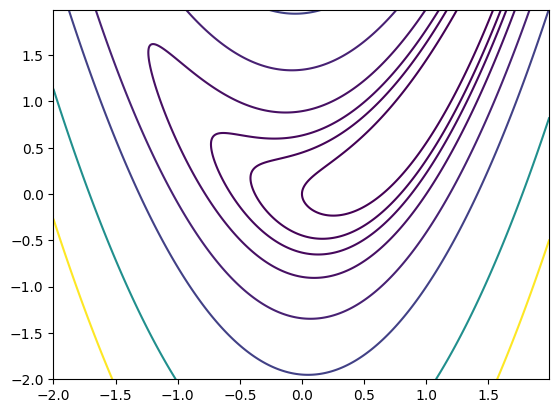

In [41]:
import matplotlib.pyplot as plt

def rosenbrock(x, y, a=1, b=5): 
    return (a-x)**2 + b*(y - x**2)**2

x, y = np.mgrid[-2:2:0.01, -2:2:0.01]
z = rosenbrock(x, y)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.contour(x,y,z, levels=[1,2,3,5,10,20,50,100])


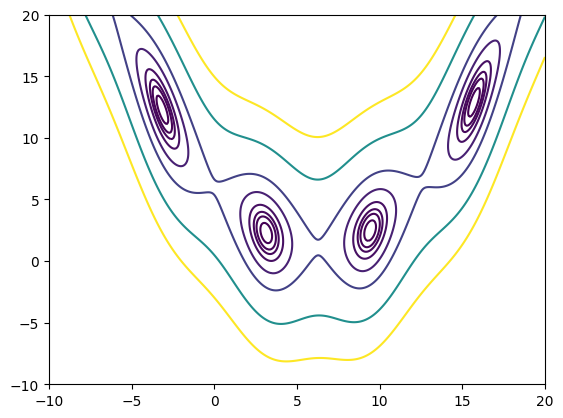

In [40]:
import matplotlib.pyplot as plt
from math import pi, cos

def branin(x, y, a=1, b=5.1/(4*pi**2), c=5/pi, r=6, s=10, t=1/(8*pi)):
    return a * (y - b * x**2 + c * x - r)**2 + s * (1 - t) * cos(x) + s
vectorized_branin = np.vectorize(branin)

x, y = np.meshgrid(np.linspace(-10, 20, 400), np.linspace(-10, 20, 400))
z = vectorized_branin(x, y)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.contour(x,y,z, levels=[1,2,3,5,10,20,50,100])

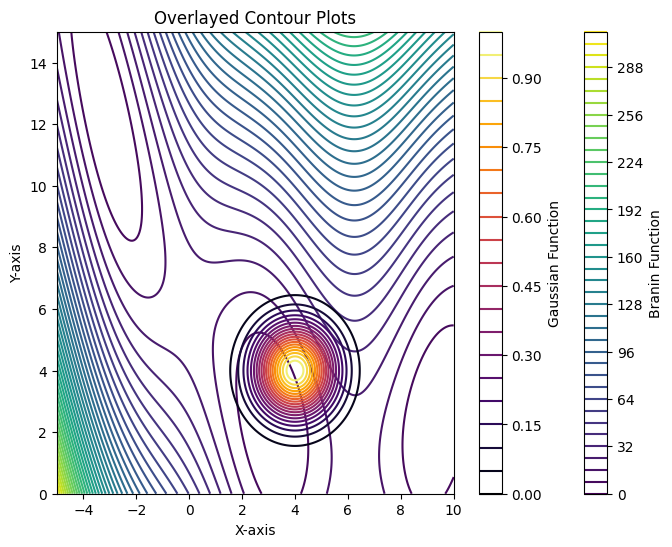

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos

# Branin function definition
def branin(x, y, a=1, b=5.1/(4*pi**2), c=5/pi, r=6, s=10, t=1/(8*pi)):
    return a * (y - b * x**2 + c * x - r)**2 + s * (1 - t) * cos(x) + s

# Vectorize the Branin function
vectorized_branin = np.vectorize(branin)

# Create mesh grids for x and y values
x, y = np.meshgrid(np.linspace(-5, 10, 400), np.linspace(0, 15, 400))  # Create a grid

# Compute Branin function values at each point
z = vectorized_branin(x, y)

# Generate a second function for overlay (for example, a Gaussian)
def gaussian(x, y, mu_x=4, mu_y=4, sigma_x=1, sigma_y=1):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))

# Compute Gaussian function values at each point
z_gaussian = gaussian(x, y)

# Create a contour plot
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111)

# Plot the first contour (Branin function)
contour1 = ax1.contour(x, y, z, levels=40, cmap='viridis')  # Branin function

# Plot the second contour (Gaussian function)
contour2 = ax1.contour(x, y, z_gaussian, levels=20, cmap='inferno')  # Gaussian function

# Add color bars for both contour plots
fig1.colorbar(contour1, ax=ax1, orientation='vertical', label='Branin Function')
fig1.colorbar(contour2, ax=ax1, orientation='vertical', label='Gaussian Function')

# Add titles and labels
ax1.set_title("Overlayed Contour Plots")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")

# Display the plot
plt.show()

## Cross entropy
Now i will implement the **Fully Adaptive Cross Entropy** algorithm. 

In [49]:
import numpy as np
from scipy.stats import multivariate_normal

def FullyAdaptiveCrossEntropy(objFn, dist, maxIter, numSamples=100, numEliteSamples=10):
    for iter in range(maxIter):
        # Sample from the multivariate normal distribution
        samples = dist.rvs(size=numSamples)
        # sort samples by value of the objective function
        sortedIndices = np.argsort([objFn(x[0], x[1]) for x in samples])
        sortedSamples = samples[sortedIndices]

        # fit mutlivariate normal to best samples
        mean, cov = multivariate_normal.fit(sortedSamples[:numEliteSamples])
        dist = multivariate_normal(mean, cov)
    return mean, cov

mean = [-2.0, -0.2]
cov = [[5, 0.6], [0.6, 3.0]]
rv = multivariate_normal(mean, cov)

FullyAdaptiveCrossEntropy(branin, rv, 12)

(array([3.1415926 , 2.27500029]),
 array([[ 7.62839374e-14, -3.25745771e-14],
        [-3.25745771e-14,  8.41096398e-13]]))

This next block will make drawings of the process that the algorithm takes.

In [ ]:
from scipy.stats import multivariate_normal


def FullyAdaptiveCrossEntropyDraw(objFn, dist, maxIter, numSamples=100, numEliteSamples=10):
    arr_samples=[]
    arr_elite=[]
    arr_dist=[]
    for iter in range(maxIter):
        # Sample from the multivariate normal distribution
        samples = dist.rvs(size=numSamples)
        # sort samples by value of the objective function
        sortedIndices = np.argsort([objFn(x[0], x[1]) for x in samples])
        sortedSamples = samples[sortedIndices]

        # fit mutlivariate normal to best samples
        mean, cov = multivariate_normal.fit(sortedSamples[:numEliteSamples])
        dist = multivariate_normal(mean, cov)

        arr_samples.append(samples)
        arr_elite.append(sortedSamples[:numEliteSamples])
        arr_dist.append((mean, cov))
    return arr_samples, arr_elite, arr_dist

# starting values for the distribution
mean = [-2.0, -0.2]
cov = [[10, 0.6], [0.6, 10]]
rv = multivariate_normal(mean, cov)

# fig zero
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

x, y = np.meshgrid(np.linspace(-10, 15, 400), np.linspace(-10, 15, 400))
pos = np.dstack((x, y))

z_branin = vectorized_branin(x, y)
ax.contourf(x,y,z_branin, levels=[0,1,2,3,5,10,20,50,100])
z_mv = rv.pdf(pos)
ax.contour(x,y,z_mv, levels=5, cmap='inferno')
ax.set_title(f"Plot 0")
plt.savefig(f"Plot 0.png")

# obtaining the data
samples, elite, dists = FullyAdaptiveCrossEntropyDraw(branin, rv, 15, 50)
dists.insert(0, (mean, cov))

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random

def branin(x, y, a=1, b=5.1/(4*pi**2), c=5/pi, r=6, s=10, t=1/(8*pi)):
    return a * (y - b * x**2 + c * x - r)**2 + s * (1 - t) * cos(x) + s
vectorized_branin = np.vectorize(branin)

# select n random samples within the bounds 2D
def selectSamples(samples, n, lowerbounds, upperbounds):
    selection = []
    counter = 0
    while (len(selection) < n and counter < 100):
        counter = counter + 1
        candidate = random.choice(samples)
        if (candidate[0] > lowerbounds[0] and candidate[0] < upperbounds[0]):
            if (candidate[1] > lowerbounds[1] and candidate[1] < upperbounds[1]):
                selection.append(candidate)
    return np.array(selection)

for i in range(len(dists)-1):
    
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111)
    if(i<3):
        lowerbounds = [-5, -5]
        upperbounds = [10, 10] 
    elif (i >= 3):
        lowerbounds = [0, 0]
        upperbounds = [5, 5]
    
    x, y = np.meshgrid(np.linspace(lowerbounds[0], upperbounds[0], 400), np.linspace(lowerbounds[1], upperbounds[1], 400))
    pos = np.dstack((x, y))

    z_branin = vectorized_branin(x, y)
    ax.contourf(x,y,z_branin, levels=[0,1,2,3,5,10,20,50,100,200])
    
    rv = multivariate_normal(dists[i][0], dists[i][1])
    z_mv = rv.pdf(pos)
    ax.contour(x,y,z_mv, levels=[1e-3, 1e-2, 5e-2, 1e-1, 5e-1, 9e-1], colors='k')
    ax.set_title(f"Plot {i + 1}")

    # select samples to plot, cant plot everything
    select = selectSamples(samples[i], 20, lowerbounds, upperbounds)
    ax.plot(select[:, 0], select[:, 1], 'ko')
    # sometimes elite samples fall outside the bounds 
    elite_arr = selectSamples(elite[i], 8, lowerbounds, upperbounds)
    ax.plot(elite_arr[:, 0], elite_arr[:,1], 'ro')
    plt.savefig(f"CEplots/Plot{i + 1}.png")


    

That concludes the figures for CE. In the future, do a simple comparison of how long it takes the algorithm to "converge" on a zero

## Covariance Matrix Adaptation - Evolutionary Strategy
Now i will implement the **CMA-ES** algorithm. 